In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data_penjualan.csv', usecols=['ReceiptNumber', 'Date', 'Items', 'Quantity', 'NetSales'])

In [56]:
df.head(1000)

,ReceiptNumber,Date,Items,Quantity,NetSales,total
1496,TSC0Y5,2023-01-18,Strawberry Yakult,1.0,25000.0,25000.0
2317,TSC1OU,2023-01-26,Kopi Baileys,1.0,25000.0,25000.0
2522,TSC1UK,2023-01-28,Lemon Tea,1.0,26000.0,26000.0
3095,TSC2CO,2023-02-03,Aglio Oglio,1.0,40000.0,40000.0
4027,1Z4PCVK,2023-02-14,Richbowl Rib Eye Sambal Matah,1.0,38000.0,38000.0
6085,1Z4PEAE,2023-03-04,Brownies Choco,1.0,17000.0,17000.0
16039,1Z4PL1E,2023-05-28,Lychee Yakult,1.0,28000.0,28000.0


In [5]:
df.dtypes

ReceiptNumber     object
Date              object
Items             object
Quantity         float64
NetSales         float64
dtype: object

In [57]:
#recency

day='2024-01-01'
day=pd.to_datetime(day)
df['Date']=pd.to_datetime(df['Date'])

recency = df.groupby(['Items']).agg({'Date': lambda x: ((day-x.max()).days)})
recency.head(10)

,Date
Items,
Aglio Oglio,332
Brownies Choco,303
Kopi Baileys,340
Lemon Tea,338
Lychee Yakult,218
Richbowl Rib Eye Sambal Matah,321
Strawberry Yakult,348


In [58]:
#frecuency

freq=df.drop_duplicates(subset="ReceiptNumber").groupby(["Items"])[["ReceiptNumber"]].count()

In [59]:
#Frecuency
freq.head(100)

,ReceiptNumber
Items,
Aglio Oglio,1
Brownies Choco,1
Kopi Baileys,1
Lemon Tea,1
Lychee Yakult,1
Richbowl Rib Eye Sambal Matah,1
Strawberry Yakult,1


In [60]:
#Monetary
df["total"] = df["NetSales"]*df["Quantity"]

In [63]:
#Monetary
money = df.groupby(['Items'])[['total']].sum()
money

,total
Items,
Aglio Oglio,40000.0
Brownies Choco,17000.0
Kopi Baileys,25000.0
Lemon Tea,26000.0
Lychee Yakult,28000.0
Richbowl Rib Eye Sambal Matah,38000.0
Strawberry Yakult,25000.0


In [64]:
df.dtypes

ReceiptNumber            object
Date             datetime64[ns]
Items                    object
Quantity                float64
NetSales                float64
total                   float64
dtype: object

In [73]:
RFM=pd.concat([recency,freq,money],axis=1)
recency.columns=["Recency"]
freq.columns=["Frecuency"]
money.columns=["Monetary"]



In [74]:
RFM.head(100)

,Recency,Frecuency,Monetary
Items,,,
Aglio Oglio,332,1,40000.0
Brownies Choco,303,1,17000.0
Kopi Baileys,340,1,25000.0
Lemon Tea,338,1,26000.0
Lychee Yakult,218,1,28000.0
Richbowl Rib Eye Sambal Matah,321,1,38000.0
Strawberry Yakult,348,1,25000.0


In [53]:
#Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

sim = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_data = sim.fit_transform(RFM)

scaler=StandardScaler()
scaled=scaler.fit_transform(imputed_data)




c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\1567\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

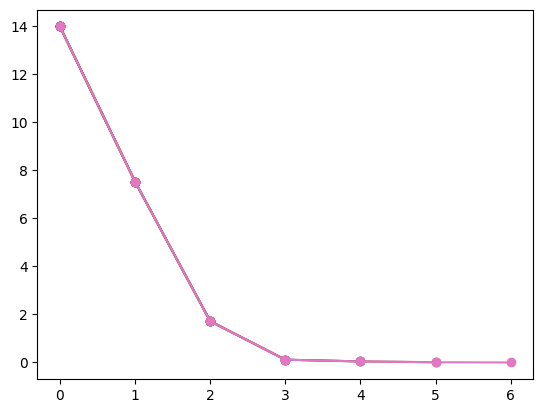

In [72]:
#Clustering
from sklearn.cluster import KMeans

inertia=[]
for i in np.arange(1,8):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)
    plt.plot(inertia, marker='o')
    